In [1]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn

In [3]:
df = pd.read_excel("lgbtdata.xlsx")
dfgreen = pd.read_excel("green__space.xlsx", sheet_name="urban.parks", skiprows = 1)
LAD = pd.read_excel("infuse_dist_lyr_2011 2.xlsx", skiprows =1)

In [4]:
LAD.dropna()

,geo_code,geo_label,geo_labelw,label,name,x,y
0,W06000016,Rhondda Cynon Taf,Rhondda Cynon Taf,W92000004W06000016,Rhondda Cynon Taf,300778.898623,195591.659779
2,W06000013,Bridgend,Pen-y-bont ar Ogwr,W92000004W06000013,Bridgend,289143.169494,185318.274756
7,W06000022,Newport,Casnewydd,W92000004W06000022,Newport,333419.289427,186510.663009
23,W06000019,Blaenau Gwent,Blaenau Gwent,W92000004W06000019,Blaenau Gwent,317716.089338,208237.856875
52,W06000015,Cardiff,Caerdydd,W92000004W06000015,Cardiff,316848.315371,179515.663806
65,W06000006,Wrexham,Wrecsam,W92000004W06000006,Wrexham,331769.935927,344143.231263
73,W06000023,Powys,Powys,W92000004W06000023,Powys,304004.293218,270453.002952
89,W06000010,Carmarthenshire,Sir Gaerfyrddin,W92000004W06000010,Carmarthenshire,251265.412241,224570.470493
106,W06000012,Neath Port Talbot,Castell-nedd Port Talbot,W92000004W06000012,Neath Port Talbot,279561.367007,199320.957613
114,W06000005,Flintshire,Sir y Fflint,W92000004W06000005,Flintshire,322432.946524,369608.140287


In [5]:
greendfsim = dfgreen[['LAD code', 'Average garden size for flats in built up area1', 'Average size of nearest park or public garden (m2)', 'Average combined size of parks or public gardens within 1,000 m radius (m2)','Average population per park or public garden']]

In [6]:
df.head()

,Area code,Area name,Straight,Gay or Lesbian\n(number),Bisexual\n(number),Pansexual\n(number),Asexual\n(number),Queer\n(number),All other sexual orientations\n(number),Not answered\n(number),Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent)
0,E06000001,Hartlepool,68070,1121,784,118,28,7,3,4554,91.14,1.50,1.05,0.16,0.04,0.01,0.00,6.10
1,E06000002,Middlesbrough,102027,1787,1385,314,80,18,29,8298,89.55,1.57,1.22,0.28,0.07,0.02,0.03,7.28
2,E06000003,Redcar and Cleveland,102561,1492,995,167,63,10,8,7046,91.29,1.33,0.89,0.15,0.06,0.01,0.01,6.27
3,E06000004,Stockton-on-Tees,144661,2283,1471,246,52,15,14,9268,91.55,1.44,0.93,0.16,0.03,0.01,0.01,5.87
4,E06000005,Darlington,80549,1333,990,163,47,7,7,5010,91.42,1.51,1.12,0.19,0.05,0.01,0.01,5.69


In [7]:
df =df.rename(columns={ "Gay or Lesbian\n(number)": "Gay&Lesbian", "Bisexual\n(number)":"bisexual", "Pansexual\n(number)":"pansexual", "Asexual\n(number)": "asexual", "Queer\n(number)":"queer"})

In [8]:
df['LGBT'] = df['Gay&Lesbian'] + df['bisexual'] + df['pansexual']+ df['asexual'] + df['queer']
df.head()


,Area code,Area name,Straight,Gay&Lesbian,bisexual,pansexual,asexual,queer,All other sexual orientations\n(number),Not answered\n(number),Straight or Heterosexual\n(percent),Gay or Lesbian\n(percent),Bisexual\n(percent),Pansexual\n(percent),Asexual\n(percent),Queer\n(percent),All other sexual orientations\n(percent),Not answered\n(percent),LGBT
0,E06000001,Hartlepool,68070,1121,784,118,28,7,3,4554,91.14,1.50,1.05,0.16,0.04,0.01,0.00,6.10,2058
1,E06000002,Middlesbrough,102027,1787,1385,314,80,18,29,8298,89.55,1.57,1.22,0.28,0.07,0.02,0.03,7.28,3584
2,E06000003,Redcar and Cleveland,102561,1492,995,167,63,10,8,7046,91.29,1.33,0.89,0.15,0.06,0.01,0.01,6.27,2727
3,E06000004,Stockton-on-Tees,144661,2283,1471,246,52,15,14,9268,91.55,1.44,0.93,0.16,0.03,0.01,0.01,5.87,4067
4,E06000005,Darlington,80549,1333,990,163,47,7,7,5010,91.42,1.51,1.12,0.19,0.05,0.01,0.01,5.69,2540


In [9]:
d2 = df[["LGBT","Straight", "Area code", "Area name"]]

In [11]:
merged_df = pd.merge(greendfsim, d2, left_on='LAD code', right_on = 'Area code' , how='inner')

In [12]:
LADmerged_df = pd.merge(merged_df, LAD, left_on='LAD code', right_on = 'geo_code' , how='inner')

In [13]:
from geopandas import points_from_xy

gdw = gpd.GeoDataFrame(
    LADmerged_df, geometry=gpd.points_from_xy(LADmerged_df.x, LADmerged_df.y)
)

In [14]:
gdw.dropna()

,LAD code,Average garden size for flats in built up area1,Average size of nearest park or public garden (m2),"Average combined size of parks or public gardens within 1,000 m radius (m2)",Average population per park or public garden,LGBT,Straight,Area code,Area name,geo_code,geo_label,geo_labelw,label,name,x,y,geometry
30076,W06000001,672.790053,545.140850,545.000000,9647.332252,1164,51430,W06000001,Isle of Anglesey,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,241819.387980,379154.574396,POINT (241819.388 379154.574)
30077,W06000001,672.790053,545.140850,545.000000,9647.332252,1164,51430,W06000001,Isle of Anglesey,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,241819.387980,379154.574396,POINT (241819.388 379154.574)
30078,W06000001,672.790053,545.140850,545.000000,9647.332252,1164,51430,W06000001,Isle of Anglesey,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,241819.387980,379154.574396,POINT (241819.388 379154.574)
30079,W06000001,672.790053,912.145350,912.000000,13914.945713,1164,51430,W06000001,Isle of Anglesey,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,241819.387980,379154.574396,POINT (241819.388 379154.574)
30080,W06000001,672.790053,545.140850,545.000000,9647.332252,1164,51430,W06000001,Isle of Anglesey,W06000001,Isle of Anglesey,Ynys Môn,W92000004W06000001,Isle of Anglesey,241819.387980,379154.574396,POINT (241819.388 379154.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31906,W06000024,366.152912,564856.752250,564856.000000,27131.650462,1129,43637,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,Merthyr Tudful,W92000004W06000024,Merthyr Tydfil,306118.142286,205570.977834,POINT (306118.142 205570.978)
31907,W06000024,366.152912,564856.752250,604608.050000,27131.650462,1129,43637,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,Merthyr Tudful,W92000004W06000024,Merthyr Tydfil,306118.142286,205570.977834,POINT (306118.142 205570.978)
31908,W06000024,366.152912,399720.480087,399756.925926,21867.039576,1129,43637,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,Merthyr Tudful,W92000004W06000024,Merthyr Tydfil,306118.142286,205570.977834,POINT (306118.142 205570.978)
31909,W06000024,366.152912,28529.142255,212782.636364,6692.388386,1129,43637,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,Merthyr Tudful,W92000004W06000024,Merthyr Tydfil,306118.142286,205570.977834,POINT (306118.142 205570.978)


In [15]:
# This is the Plotting Function Jon wrote
def plt_ldn(w, b):
    """
    Creates a new figure of a standard size with the 
    water (w) and boundary (b) layers set up for easy
    plotting. Right now this function assumes that you're
    looking at London, but you could parameterise it in
    other ways ot allow it to work for other areas.
    
    w: a water layer for London
    b: a borough (or other) boundary layer for London
    """
    fig, ax = plt.subplots(1, figsize=(14, 12))
    w.plot(ax=ax, color='#79aef5', zorder=2)
    b.plot(ax=ax, edgecolor='#cc2d2d', facecolor='None', zorder=3)
    ax.set_xlim([502000,563000])
    ax.set_ylim([155000,201500])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return fig, ax

########################
# These may no longer be relevant because of changes to geopandas API

def default_cmap(n, outliers=False):
    cmap = mpl.cm.get_cmap('viridis_r', n)
    colors = cmap(np.linspace(0,1,n))
    if outliers:
        gray = np.array([225/256, 225/256, 225/256, 1])
        colors = np.insert(colors, 0, gray, axis=0)
    return ListedColormap(colors)

# mappable = ax.collections[-1] if you add the geopandas
# plot last.
def add_colorbar(mappable, ax, cmap, norm, breaks, outliers=False):
    cb = fig.colorbar(mappable, ax=ax, cmap=cmap, norm=norm,
                    boundaries=breaks,
                    extend=('min' if outliers else 'neither'), 
                    spacing='uniform',
                    orientation='horizontal',
                    fraction=0.05, shrink=0.5, pad=0.05)
    cb.set_label("Cluster Number")

In [16]:
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """Downloads and caches a remote file locally.
    
    The function sits between the 'read' step of a pandas or geopandas
    data frame and downloading the file from a remote location. The idea
    is that it will save it locally so that you don't need to remember to
    do so yourself. Subsequent re-reads of the file will return instantly
    rather than downloading the entire file for a second or n-th itme.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    # Check if dest+filename does *not* exist -- 
    # that would mean we have to download it!
    if not os.path.isfile(dfn) or os.path.getsize(dfn) < 1:
        
        print(f"{dfn} not found, downloading!")

        # Convert the path back into a list (without)
        # the filename -- we need to check that directories
        # exist first.
        path = os.path.split(dest)
        
        # Create any missing directories in dest(ination) path
        # -- os.path.join is the reverse of split (as you saw above)
        # but it doesn't work with lists... so I had to google how
        # to use the 'splat' operator! os.makedirs creates missing
        # directories in a path automatically.
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        # Download and write the file
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print('Done downloading...')

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [17]:
geo_listings2022 = gpd.GeoDataFrame(gdw,geometry=gpd.points_from_xy(gdw .x, gdw .y, crs='epsg:4326'))
geo_listings2022.to_crs('epsg:27700')

#check the type
print(type(geo_listings2022))
print(type(geo_listings2022.geometry))
geo_listings2022.LGBT.head

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>


<bound method NDFrame.head of 0        12456
1        12456
2        12456
3        12456
4        12456
         ...  
31906     1129
31907     1129
31908     1129
31909     1129
31910     1129
Name: LGBT, Length: 31911, dtype: int64>

In [18]:
ddir  = os.path.join('data','geo') # destination directory
spath = 'https://github.com/jreades/fsds/blob/master/data/src/' # source path

boros = gpd.read_file( cache_data(spath+'Boroughs.gpkg?raw=true', ddir) )
water = gpd.read_file( cache_data(spath+'Water.gpkg?raw=true', ddir) )
green = gpd.read_file( cache_data(spath+'Greenspace.gpkg?raw=true', ddir) )

print('Done.')

Found data/geo/Boroughs.gpkg locally!
Found data/geo/Water.gpkg locally!
Found data/geo/Greenspace.gpkg locally!
Done.


In [20]:
mask = geo_listings2022['LAD code'].str.startswith('E09')
geo_listings2022 = geo_listings2022[mask]

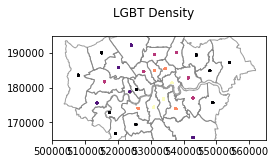

In [22]:
ax = plt.subplot2grid((4, 1), (0, 0), rowspan= 2)
boros.plot(edgecolor='grey', facecolor='none', linewidth=1, alpha=0.75, ax=ax)
geo_listings2022.plot(column='LGBT', cmap='magma', alpha=0.50, scheme='NaturalBreaks', markersize=2, ax=ax)
ax.set_xlim([500000, 565000])
ax.set_ylim([165000, 195000])
plt.suptitle("LGBT Density")
plt.show()


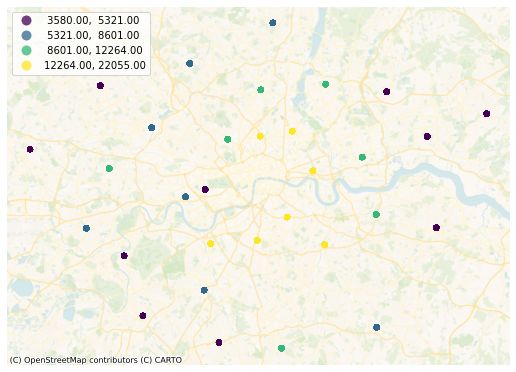

In [49]:
import contextily 


f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
geo_listings2022.plot(
    column="LGBT",
    cmap="viridis",
    scheme="quantiles",
    k=4,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Add basemap
contextily.add_basemap(
    ax,
    crs=boros.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
ax.set_axis_off();

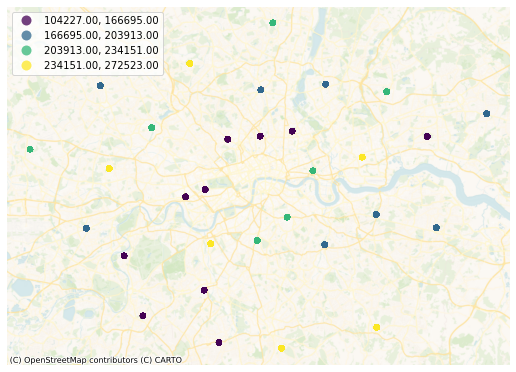

In [50]:
import contextily 


f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
geo_listings2022.plot(
    column="Straight",
    cmap="viridis",
    scheme="quantiles",
    k=4,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Add basemap
contextily.add_basemap(
    ax,
    crs=boros.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
ax.set_axis_off();


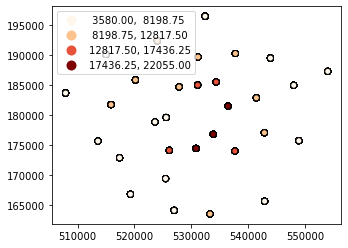

In [30]:
geo_listings2022.plot(column='LGBT', scheme='equal_interval', k=4, cmap='OrRd', edgecolor='k', legend=True)
contextily.add_basemap(
    ax,
    crs=boros.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
ax.set_axis_off();


In [31]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(geo_listings2022[['Average size of nearest park or public garden (m2)', 'Average garden size for flats in built up area1', 'LGBT', 'Average population per park or public garden', 'Straight']])

In [46]:
features_df = geo_listings2022[[ 'Average size of nearest park or public garden (m2)', 'Average size of nearest park or public garden (m2)', 'LGBT', 'Average population per park or public garden','Straight']]


In [47]:
features_df.dropna()

,Average size of nearest park or public garden (m2),Average size of nearest park or public garden (m2),LGBT,Average population per park or public garden,Straight
17945,2.472101e+05,2.472101e+05,12264,26801.103987,146868
17946,8.265571e+05,8.265571e+05,12264,33687.799768,146868
17947,3.084623e+06,3.084623e+06,12264,60529.424537,146868
17948,3.163129e+06,3.163129e+06,12264,61462.619176,146868
17949,4.875559e+05,4.875559e+05,12264,24056.101504,146868
...,...,...,...,...,...
22641,2.906785e+03,2.906785e+03,9929,8081.299707,191049
22642,9.514559e+04,9.514559e+04,9929,9105.798389,191049
22643,9.789833e+04,9.789833e+04,9929,10294.818381,191049
22644,1.248126e+06,1.248126e+06,9929,52702.668993,191049


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(features_df)

# Transform the data
scaled_data = scaler.transform(features_df)

# Print the results
print(scaled_data)

[[2.59161743e-02 2.59161743e-02 4.70040595e-01 2.72792485e-01
  2.53369064e-01]
 [8.67255336e-02 8.67255336e-02 4.70040595e-01 3.48593473e-01
  2.53369064e-01]
 [3.23736439e-01 3.23736439e-01 4.70040595e-01 6.44035840e-01
  2.53369064e-01]
 ...
 [1.02441247e-02 1.02441247e-02 3.43653586e-01 9.11098883e-02
  5.15888672e-01]
 [1.30974154e-01 1.30974154e-01 3.43653586e-01 5.57887732e-01
  5.15888672e-01]
 [2.25772228e-04 2.25772228e-04 3.43653586e-01 7.46938968e-02
  5.15888672e-01]]


In [75]:
sns.pairplot(df22[['Avg size of park (m2)','Straight']])


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2738731149.py, line 2)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


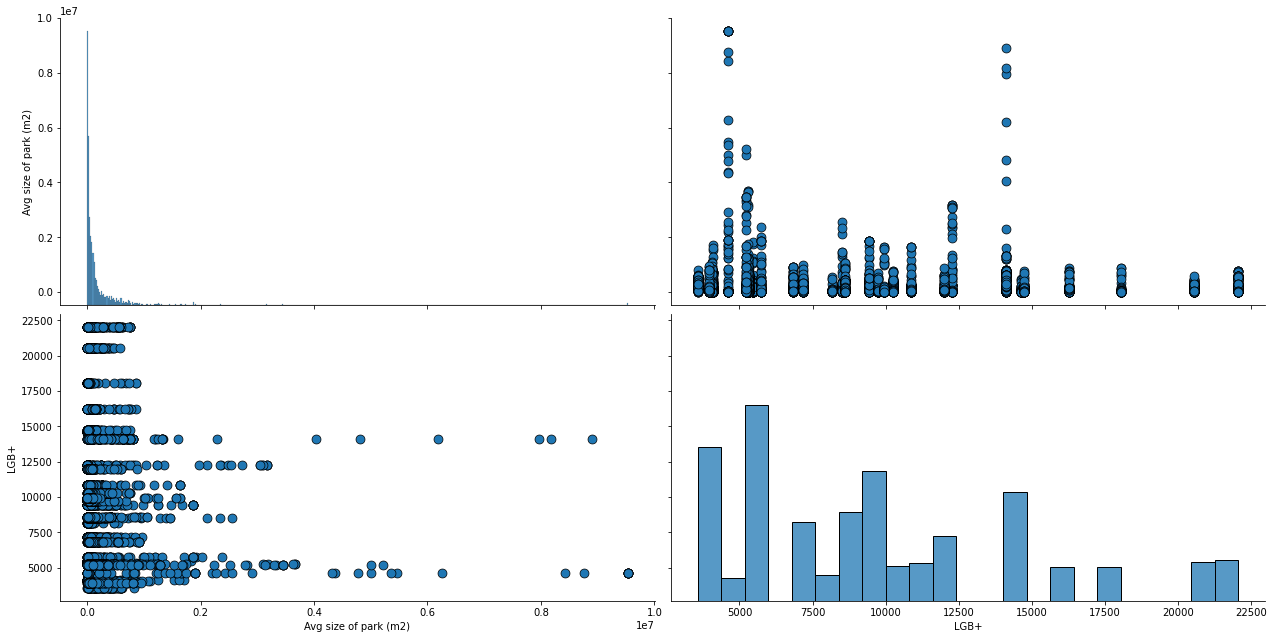

In [80]:
sns.pairplot(df22[['Avg size of park (m2)','LGB+']], size=4.5, aspect=2.0,
             plot_kws={'s': 80, 'edgecolor': 'k'}, diag_kind='hist')

# Show the plot
plt.show()

In [78]:
df22=geo_listings2022.rename(columns={"Average size of nearest park or public garden (m2)":"Avg size of park (m2)", "LGBT":"LGB+"})

In [79]:
df22.head()

,LAD code,Average garden size for flats in built up area1,Avg size of park (m2),"Average combined size of parks or public gardens within 1,000 m radius (m2)",Average population per park or public garden,LGB+,Straight,Area code,Area name,geo_code,geo_label,geo_labelw,label,name,x,y,geometry
17945,E09000007,253.727255,2.472101e+05,3.314055e+06,26801.103987,12264,146868,E09000007,Camden,E09000007,Camden,NaN,E92000001E09000007,Camden,527864.856991,184663.308451,POINT (527864.85699 184663.30845)
17946,E09000007,253.727255,8.265571e+05,3.291266e+06,33687.799768,12264,146868,E09000007,Camden,E09000007,Camden,NaN,E92000001E09000007,Camden,527864.856991,184663.308451,POINT (527864.85699 184663.30845)
17947,E09000007,253.727255,3.084623e+06,3.276781e+06,60529.424537,12264,146868,E09000007,Camden,E09000007,Camden,NaN,E92000001E09000007,Camden,527864.856991,184663.308451,POINT (527864.85699 184663.30845)
17948,E09000007,253.727255,3.163129e+06,3.172498e+06,61462.619176,12264,146868,E09000007,Camden,E09000007,Camden,NaN,E92000001E09000007,Camden,527864.856991,184663.308451,POINT (527864.85699 184663.30845)
17949,E09000007,253.727255,4.875559e+05,3.255474e+06,24056.101504,12264,146868,E09000007,Camden,E09000007,Camden,NaN,E92000001E09000007,Camden,527864.856991,184663.308451,POINT (527864.85699 184663.30845)


In [86]:
df23 = df22[["Average garden size for flats in built up area1", "Avg size of park (m2)", "LGB+"]]

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=4)

# Fit the model to the data and predict the clusters
clusters = kmeans.fit_predict(df23)

# Generate the silhouette score
score = silhouette_score(df23, clusters)

print(score)

0.7990648326055398


In [91]:
from sklearn.cluster import KMeans
import numpy as np


# Fit the model to your data
kmeans.fit(df23)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Print the centroids
print(centroids)

#You can access the value of the centroid for each feature using array indexing
print("Cluster 1 centroid: ",centroids[0])

[[2.00665360e+02 8.84730262e+04 9.75830014e+03]
 [3.07988138e+02 3.26327859e+06 7.71355102e+03]
 [3.12655937e+02 8.66873856e+06 7.32271429e+03]
 [2.22696948e+02 8.36687581e+05 9.14035745e+03]]
Cluster 1 centroid:  [  200.66536014 88473.02618881  9758.30014395]


ValueError: Unrecognized marker style 'triangle-left'

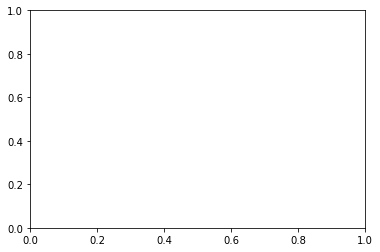

In [96]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='triangle-left', c='red', s=200)

# Add labels and title to the plot
plt.xlabel('LGBT')
plt.ylabel('Average size of parks')
plt.title('K-means Clustering')

# Show the plot
plt.show()

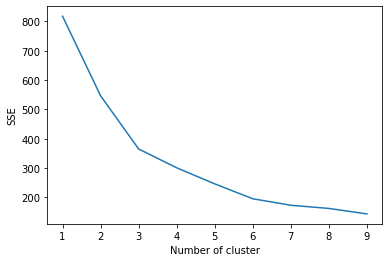

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(scaled_data)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
